# Part 2 - Ensemble FT models

## Import necessary libraries

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
tf.random.set_seed(42)

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import glob
import PIL
from PIL import Image

2.15.0


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Load X_train_std, X_test_std, y_train, y_test

In [3]:
# load training and testing numpy array from npy file
from numpy import load

X_train_std = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/X_train_std1.npy")
X_test_std = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/X_test_std1.npy")

y_train = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/y_train1.npy")
y_test = load("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/y_test1.npy")

# Evaluating all FineTuning models

## Model 1 FineTuning results

In [4]:
model1_FT = keras.models.load_model("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/Model1_FT.h5")

In [5]:
# Prediction from testing data using model1_FT

y_proba = model1_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

9/9 [==============================] - 17s 721ms/step
[4 3 1 3 0 4 1 4 1 4 0 4 1 1 4 4 0 2 2 3 3 3 1 2 0 0 4 3 1 4 3 2 0 1 1 1 3
 3 1 0 0 0 1 0 0 3 1 1 4 3 0 2 3 2 2 3 4 2 1 0 3 3 0 2 0 0 3 2 4 3 3 2 4 2
 3 3 1 2 4 4 2 3 0 1 4 1 1 2 2 2 2 0 0 2 4 1 3 2 1 0 2 3 3 3 4 2 4 4 1 3 0
 2 4 3 1 0 3 2 1 0 1 3 1 1 1 0 2 2 1 0 4 2 2 2 1 1 1 2 0 2 1 1 1 4 3 0 0 2
 0 2 3 0 0 1 1 4 2 0 2 3 4 3 2 3 0 0 1 0 1 1 2 4 2 1 4 3 2 3 4 0 0 3 2 3 4
 0 3 2 3 4 3 0 3 3 0 2 0 3 3 0 3 2 1 1 3 0 2 4 0 0 4 0 3 4 1 2 2 3 1 2 3 4
 2 0 0 2 0 4 4 4 3 2 1 2 4 3 4 1 1 4 3 3 0 0 2 0 1 1 1 4 1 3 1 4 2 3 0 2 4
 2 1 0 2 4 2 1 4 0 1 0]


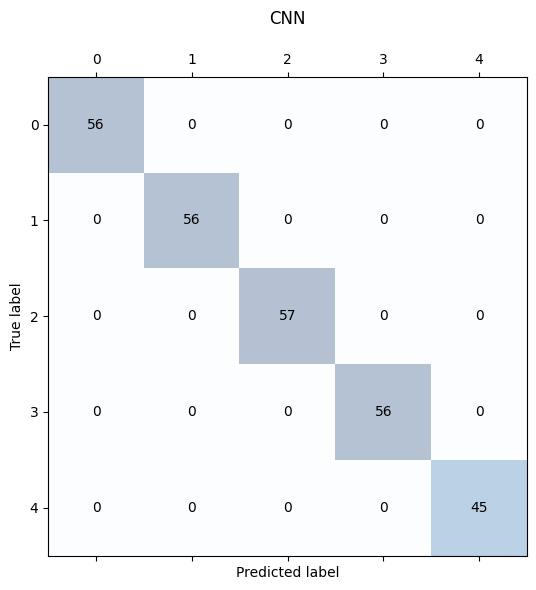

In [6]:
# Confusion matrix of testing data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [7]:
# Calculating the precision, recall and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  1.0
Recall:  1.0
F1-score:  1.0


## Model 2 FineTuning results

In [8]:
model2_FT = keras.models.load_model("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/Model2_FT.h5")

In [9]:
# Predictoins from testing data using model2_FT

y_proba = model2_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

9/9 [==============================] - 7s 278ms/step
[4 3 1 3 0 4 1 4 1 4 0 4 1 1 4 4 0 2 2 3 3 3 1 2 0 0 4 3 1 4 3 2 0 1 1 1 3
 3 1 0 0 0 1 0 0 3 1 1 4 3 0 2 3 2 2 3 4 2 1 0 3 3 0 2 0 0 3 2 4 3 3 2 4 2
 3 3 1 2 4 4 2 3 0 1 4 1 1 2 2 2 2 0 0 2 4 1 3 2 1 0 2 3 3 3 4 2 4 4 1 3 0
 2 4 3 1 0 3 2 1 0 1 3 1 1 1 0 2 2 1 0 4 2 2 2 1 1 1 2 0 2 1 1 1 4 3 0 0 2
 0 2 3 0 0 1 1 4 2 0 2 3 4 3 2 3 0 0 1 0 1 1 2 4 2 1 4 3 2 3 4 0 0 3 2 3 4
 0 3 2 3 4 3 0 3 3 0 2 0 3 3 0 3 2 1 1 3 0 2 4 0 0 4 0 3 4 1 2 2 3 1 2 3 4
 2 0 0 2 0 4 4 4 3 2 1 2 4 3 4 1 1 4 3 3 0 0 2 0 1 1 1 4 1 3 1 4 2 3 0 2 4
 2 1 0 2 4 2 1 4 0 1 0]


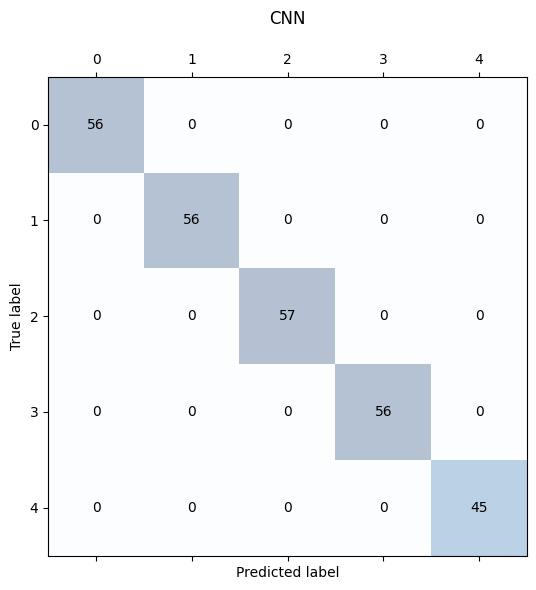

In [10]:
# Confusion matrix of testing data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [11]:
# Calculating the precision, recall and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  1.0
Recall:  1.0
F1-score:  1.0


## Model 3 FineTuning results

In [12]:
# Load the saved best model
from keras import layers

class LayerScale(layers.Layer):
    """Layer scale module.

    References:
      - https://arxiv.org/abs/2103.17239

    Args:
      init_values (float): Initial value for layer scale. Should be within
        [0, 1].
      projection_dim (int): Projection dimensionality.

    Returns:
      Tensor multiplied to the scale.
    """

    def __init__(self, init_values, projection_dim, **kwargs):
        super().__init__(**kwargs)
        self.init_values = init_values
        self.projection_dim = projection_dim

    def build(self, input_shape):
        self.gamma = tf.Variable(
            self.init_values * tf.ones((self.projection_dim,))
        )

    def call(self, x):
        return x * self.gamma

    def get_config(self):
        config = super().get_config()
        config.update(
            {
                "init_values": self.init_values,
                "projection_dim": self.projection_dim,
            }
        )
        return config

model3_FT = keras.models.load_model("/content/drive/MyDrive/Abbinav's Portfolio/Transfer Learning CNN project/Models/Model3_FT.h5", custom_objects={"LayerScale": LayerScale} )

In [13]:
y_proba = model3_FT.predict(X_test_std)
y_predict = np.argmax(y_proba, axis=-1)
print(y_predict)

9/9 [==============================] - 13s 624ms/step
[4 3 1 3 0 4 1 4 1 4 0 4 1 1 4 4 0 2 2 3 3 3 1 2 0 0 4 3 1 4 3 2 0 1 1 1 3
 3 1 0 0 0 1 0 0 3 1 1 4 3 0 2 3 2 2 3 4 2 1 0 3 3 0 2 0 0 3 2 4 3 3 2 4 2
 3 3 1 2 4 4 2 3 0 1 4 1 1 2 2 2 2 0 0 2 4 1 3 2 1 0 2 3 3 3 4 2 4 4 1 3 0
 2 4 3 1 0 3 2 1 0 1 3 1 1 1 0 2 2 1 0 4 2 2 2 1 1 1 2 0 2 1 1 1 4 3 0 0 2
 0 2 3 0 0 1 1 4 2 0 2 3 4 3 2 3 0 0 1 0 1 1 2 4 2 1 4 3 2 3 4 0 0 3 2 3 4
 0 3 2 3 4 3 0 3 3 0 2 0 3 3 0 3 2 1 1 3 0 2 4 0 0 4 0 3 4 1 2 2 3 1 2 3 4
 2 0 0 2 0 4 4 4 3 2 1 2 4 3 4 1 1 4 3 3 0 0 2 0 1 1 1 4 1 3 1 4 2 3 0 2 4
 2 1 0 2 4 2 1 4 0 1 0]


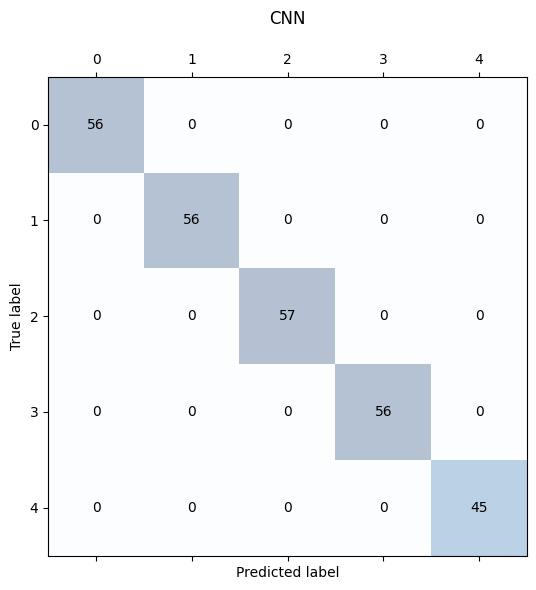

In [14]:
# Confusion matrix of testing data

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true = y_test, y_pred = y_predict)

fig, ax = plt.subplots(figsize=(6, 6))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

ax.title.set_text('CNN\n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

In [15]:
# Calculating the precision, recall and f1 score

from sklearn.metrics import precision_score, recall_score, f1_score

pScore = precision_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Precision: ", pScore)

rScore = recall_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("Recall: ", rScore)

fScore = f1_score(y_true= y_test, y_pred = y_predict, average = 'weighted')
print("F1-score: ", fScore)

Precision:  1.0
Recall:  1.0
F1-score:  1.0


# Ensemble_Predict() function to predict class labels using all FT models

In [16]:
def Ensemble_Predict(image):

  # Predict the numeric labels from FT models
  model1_pred = np.argmax(model1_FT.predict(np.expand_dims(image,axis = 0)))
  model2_pred = np.argmax(model2_FT.predict(np.expand_dims(image,axis = 0)))
  model3_pred = np.argmax(model3_FT.predict(np.expand_dims(image,axis = 0)))

  #Majority Voting
  pred_list = np.array([model1_pred, model2_pred, model3_pred])
  majority_vote = np.bincount(pred_list).argmax()

  # Decoding the original label from numeric label
  label_dict = {0: 'Damask Rose', 1: 'Echeveria flower', 2: 'Mirabilis Jalapa', 3:'Rain Lily', 4:'Zinnia Elegans'}
  original_label = label_dict.get(majority_vote)

  return original_label

## Running function on sample data

In [17]:
# Running function on 1 sample

for test_image in X_test_std[:1]:
  ensemble_prediction = Ensemble_Predict(test_image)

print(ensemble_prediction)

1/1 [==============================] - 2s 2s/step
Zinnia Elegans


In [18]:
# Running function on first 30 images from test data

ensemble_prediction = []
for image in X_test_std[:30]:
  ensemble_prediction.append(Ensemble_Predict(image))

ensemble_prediction = np.array(ensemble_prediction).reshape(-1)

1/1 [==============================] - 0s 54ms/step


In [19]:
# Above ensemble predictor can be used to predict any img sample into 5 classes

ensemble_prediction

array(['Zinnia Elegans', 'Rain Lily', 'Echeveria flower', 'Rain Lily',
       'Damask Rose', 'Zinnia Elegans', 'Echeveria flower',
       'Zinnia Elegans', 'Echeveria flower', 'Zinnia Elegans',
       'Damask Rose', 'Zinnia Elegans', 'Echeveria flower',
       'Echeveria flower', 'Zinnia Elegans', 'Zinnia Elegans',
       'Damask Rose', 'Mirabilis Jalapa', 'Mirabilis Jalapa', 'Rain Lily',
       'Rain Lily', 'Rain Lily', 'Echeveria flower', 'Mirabilis Jalapa',
       'Damask Rose', 'Damask Rose', 'Zinnia Elegans', 'Rain Lily',
       'Echeveria flower', 'Zinnia Elegans'], dtype='<U16')